## DNN

import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#from keras.models import Sequential
#from keras.layers import Dense,Dropout

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout,Dense

### Read Data

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

train.index = pd.to_datetime(train.iloc[:,0])
train       = train.iloc[:,1:]
test.index  = pd.to_datetime(test.iloc[:,0])
test        = test.iloc[:,1:]

In [3]:
train.shape

(10839, 25)

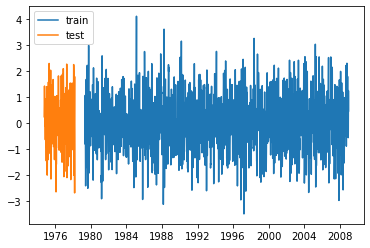

In [4]:
plt.plot(train.iloc[:,24],label='train')
plt.plot(test.iloc[:,24],label='test')
plt.legend()

In [5]:
x_train = train.iloc[:,:24]
y_train = train.iloc[:,24:25]

In [6]:
x_test = test.iloc[:,:24]
y_test = test.iloc[:,24:25]

In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((10839, 24), (10839, 1), (1266, 24), (1266, 1))

### Scale Input Data

In [8]:
sc3 = MinMaxScaler()
sc5 = MinMaxScaler()

sc5.fit(x_train[:])

train_x = sc5.transform(x_train[:])
test_x  = sc5.transform(x_test[:])


sc3.fit(y_train[:])

train_y = sc3.transform(y_train)
test_y  = sc3.transform(y_test)

train_x.max(),test_x.max(),train_y.max(),test_y.max()

(1.0000000000000002, 1.0309701979813752, 1.0, 0.7611240042603276)

#### MLP

In [9]:
# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=24, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam')

history = model.fit(train_x, train_y, validation_data=(test_x,test_y),epochs=30, batch_size=10)

Epoch 1/30
1084/1084 [==============================] - 2s 1ms/step - loss: 0.1324 - val_loss: 0.0620
Epoch 2/30
1084/1084 [==============================] - 1s 977us/step - loss: 0.0774 - val_loss: 0.0567
Epoch 3/30
1084/1084 [==============================] - 1s 962us/step - loss: 0.0709 - val_loss: 0.0551
Epoch 4/30
1084/1084 [==============================] - 1s 982us/step - loss: 0.0688 - val_loss: 0.0545
Epoch 5/30
1084/1084 [==============================] - 1s 984us/step - loss: 0.0668 - val_loss: 0.0579
Epoch 6/30
1084/1084 [==============================] - 1s 1ms/step - loss: 0.0662 - val_loss: 0.0572
Epoch 7/30
1084/1084 [==============================] - 1s 967us/step - loss: 0.0653 - val_loss: 0.0577
Epoch 8/30
1084/1084 [==============================] - 1s 970us/step - loss: 0.0650 - val_loss: 0.0591
Epoch 9/30
1084/1084 [==============================] - 1s 974us/step - loss: 0.0661 - val_loss: 0.0576
Epoch 10/30
1084/1084 [==============================] - 1s 961us/st

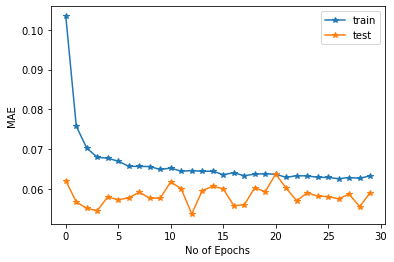

In [10]:
plt.plot(history.history['loss'],'-*',label ='train')
plt.plot(history.history['val_loss'],'-*',label ='test')
plt.ylabel('MAE')
plt.xlabel('No of Epochs')
plt.legend()

### Prediction

testing shape = 
(1266, 1)


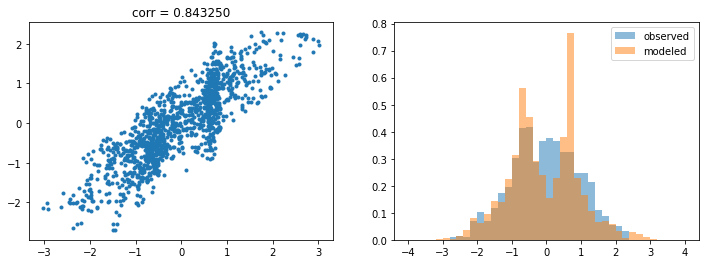

In [11]:
predict1   = model.predict(test_x)
yy_test   = sc3.inverse_transform(predict1)
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("testing shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],y_test,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm1,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

#### Contd. to Presentation